<a href="https://colab.research.google.com/github/NikhilRana2076/Diabetis_prediction/blob/main/Diabetis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. SETUP AND INITIAL DATA LOADING


In [1]:
#====================================================================================================================================================
# 1. Importing core libraries for data manipulation, visualization, and ML modeling
#====================================================================================================================================================

import pandas as pd                                                           # The primary library for data manipulation and analysis.
import numpy as np                                                            # The foundation for numerical computing
import matplotlib.pyplot as plt                                               # A library for creating visualizations
from sklearn.impute import KNNImputer                                         # Imported but not used (Median used instead)
from sklearn.preprocessing import StandardScaler                              # for Standard Scaling
from pathlib import Path                                                      # object-oriented interface for working with file system paths
from sklearn.model_selection import train_test_split                          # split the dataset into separate training and testing subsets
from sklearn.metrics import classification_report, f1_score, accuracy_score   # A suite of metrics used to evaluate the final model performance
from sklearn.metrics import confusion_matrix                                  # fundamental tool used in machine learning to evaluate the performance of a classification algorithm
from sklearn.linear_model import LogisticRegression                           # A linear model used for binary classification.
from sklearn.tree import DecisionTreeClassifier                               # A tree-based model that makes decisions by splitting the data based on features.
from sklearn.ensemble import RandomForestClassifier                           # An ensemble model that aggregates the predictions of many trees to improve accuracy and control overfitting.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV          # A hyperparameter tuning technique that exhaustively searches over a specified range of parameter values (a "grid") to find the best combination
from sklearn.svm import SVC                                                   # A powerful classification model that finds the optimal hyperplane to separate classes in the feature space
from imblearn.over_sampling import RandomOverSampler                          # Random Over Sampler resampling for imbalanced data
from imblearn.under_sampling import RandomUnderSampler                         # Random Under Sampler resampling for imbalanced dat
from imblearn.over_sampling import SMOTE                                      # SMOTE resampling for imbalanced data
from imblearn.combine import SMOTEENN                                         # Hybrid resampling for imbalanced data
import pickle                                                                 # For saving trained models



In [2]:
#====================================================================================================================================================
# 2. Mount Google Drive and set working directory
#====================================================================================================================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

folder_path = "drive/MyDrive/#UWL/Machine Learning/Group Project Testing/Main/Diabetes_prediction"
%cd $folder_path

Mounted at /content/drive
/content/drive/MyDrive/#UWL/Machine Learning/Group Project Testing/Main/Diabetes_prediction


In [3]:
#====================================================================================================================================================
# 3. Load the dataset
#====================================================================================================================================================

dataset_file = "diabetes_extended_noisy.csv"
data_frame = pd.read_csv(dataset_file)

# 2. Exploratory Data Analysis

In [4]:
print("Loaded dataset with shape:", data_frame.shape)
data_frame.head()

Loaded dataset with shape: (798, 11)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
0,2,90.0,60,0.0,0.0,23.5,0.191,25,0,2,NaN
1,1,112.0,80,45.0,132.0,34.8,0.217,24,0,2,NaN
2,2,141.0,58,34.0,128.0,25.4,0.699,24,0,2,Moderate
3,6,91.0,0,0.0,0.0,29.8,0.501,31,0,1,Moderate
4,0,109.0,88,30.0,0.0,32.5,0.855,38,1,2,Strong


In [5]:
data_frame.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
793,5,139.0,64,35.0,140.0,28.6,0.411,26,0,2,Moderate
794,1,96.0,122,0.0,0.0,22.4,0.207,27,0,3,NaN
795,10,101.0,86,37.0,0.0,45.6,1.136,38,1,2,Strong
796,0,141.0,0,0.0,0.0,42.4,0.205,29,1,1,NaN
797,0,125.0,96,0.0,0.0,22.5,0.262,21,0,2,NaN


Basic information, summsaty, missing values, and duplicates

In [6]:
#====================================================================================================================================================
# Initial Data Quality Checks
#====================================================================================================================================================

print("--- Info ---")
data_frame.info()

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               798 non-null    int64  
 1   Glucose                   798 non-null    float64
 2   BloodPressure             798 non-null    int64  
 3   SkinThickness             782 non-null    float64
 4   Insulin                   782 non-null    float64
 5   BMI                       782 non-null    float64
 6   DiabetesPedigreeFunction  798 non-null    float64
 7   Age                       798 non-null    int64  
 8   Outcome                   798 non-null    int64  
 9   PhysicalActivityLevel     798 non-null    int64  
 10  FamilyHistory             366 non-null    object 
dtypes: float64(5), int64(5), object(1)
memory usage: 68.7+ KB


In [7]:
#====================================================================================================================================================
# Initial Data Quality Checks
#====================================================================================================================================================

print("--- Summary statistics ---")
display(data_frame.describe(include='all'))

--- Summary statistics ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
count,798.000000,798.000000,798.000000,782.000000,782.000000,782.000000,798.000000,798.000000,798.000000,798.000000,366
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257
mean,3.864662,121.880202,69.002506,20.524297,78.827366,32.014066,0.467976,33.325815,0.344612,1.651629,NaN
std,3.364025,38.268527,19.410833,15.855907,113.574851,7.761333,0.329564,11.776531,0.475539,0.519570,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238250,24.000000,0.000000,1.000000,NaN
50%,3.000000,116.500000,72.000000,23.000000,27.000000,32.000000,0.365000,29.000000,0.000000,2.000000,NaN
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.618000,41.000000,1.000000,2.000000,NaN


In [8]:
print("--- Missing values (raw) ---")
print(data_frame.isnull().sum())

--- Missing values (raw) ---
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                16
Insulin                      16
BMI                          16
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
PhysicalActivityLevel         0
FamilyHistory               432
dtype: int64


In [9]:
print("--- Duplicate count ---")
print(data_frame.duplicated().sum())

--- Duplicate count ---
28


Replace medically-invalid zeros with NaN because zeros in these medical features are not physiologically valid and should be treated as missing.

In [10]:
zeros_to_nan_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create a dictionary mapping the columns to the value(s) to replace
replace_map = {col: 0 for col in zeros_to_nan_cols}

# Use the replace method on the entire DataFrame subset
data_frame[zeros_to_nan_cols] = data_frame[zeros_to_nan_cols].replace(replace_map, np.nan)

# Verification (you would still need a separate line to print the final counts)
print("Missing values after replacing zeros:")
print(data_frame.isnull().sum())


Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                37
SkinThickness               245
Insulin                     397
BMI                          26
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
PhysicalActivityLevel         0
FamilyHistory               432
dtype: int64


Histograms for numeric features (one plot per feature) to visualise distributions and skewness.

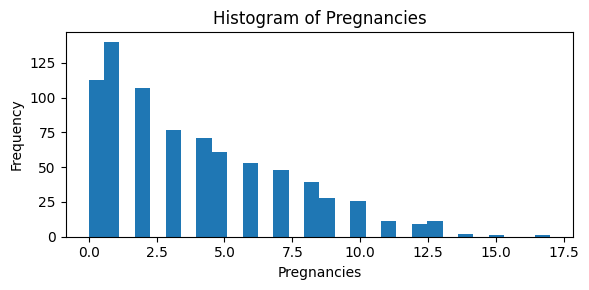

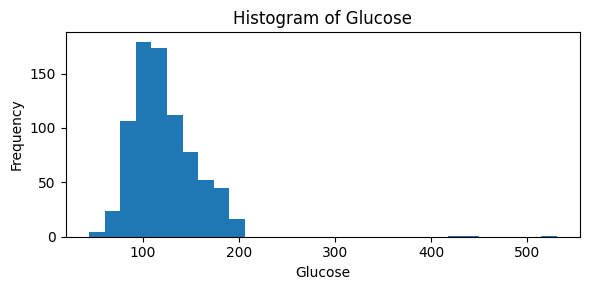

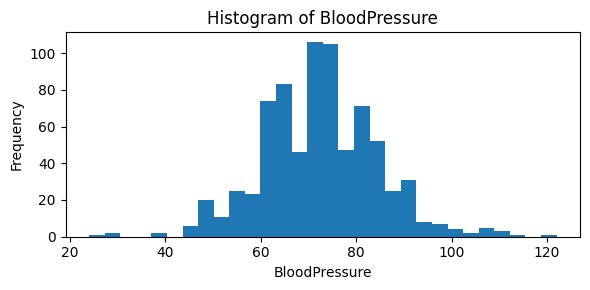

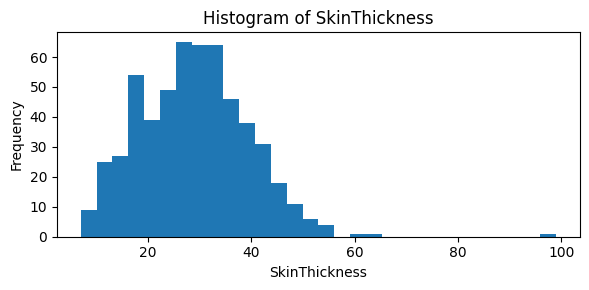

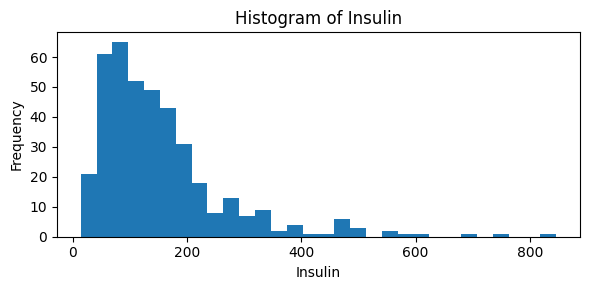

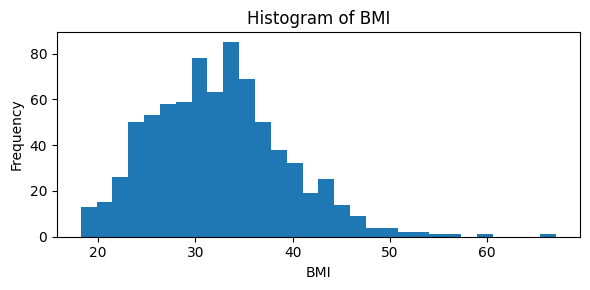

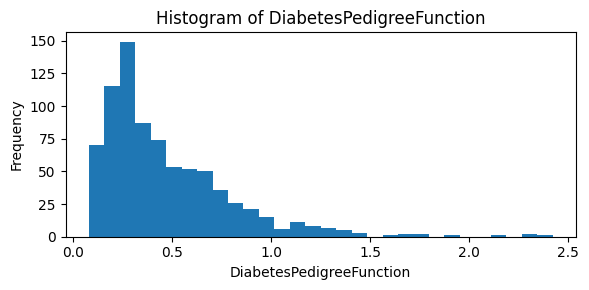

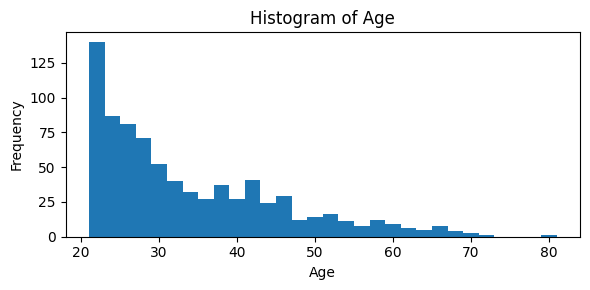

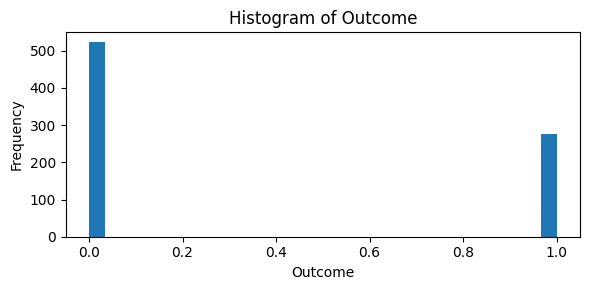

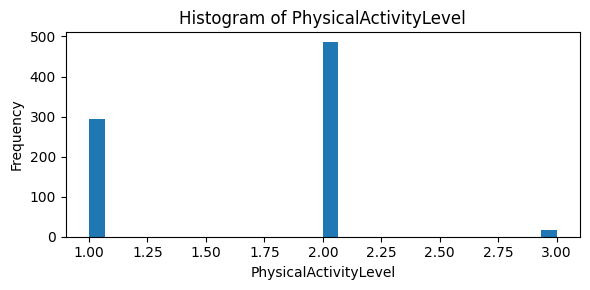

In [11]:
numeric_cols = data_frame.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.hist(data_frame[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Boxplots to inspect outliers (one plot per feature) which clarifies extreme values for later handling.

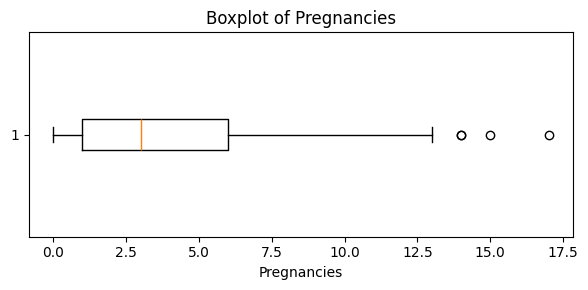

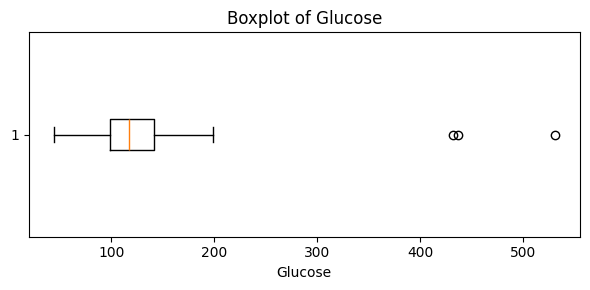

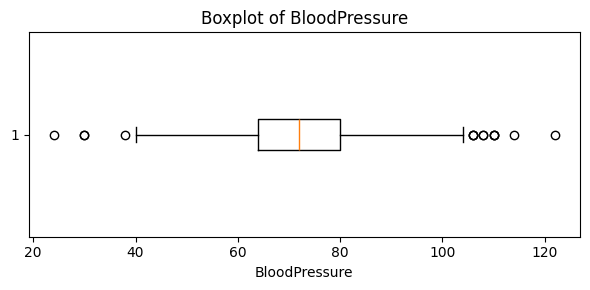

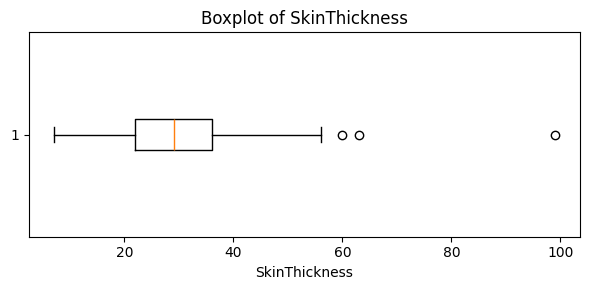

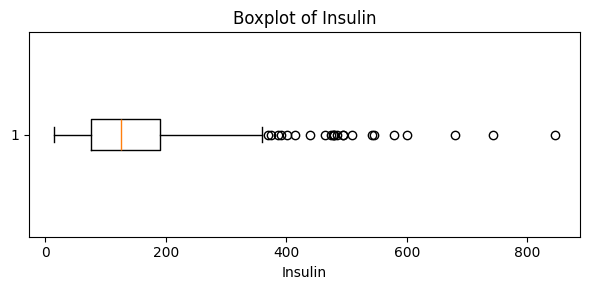

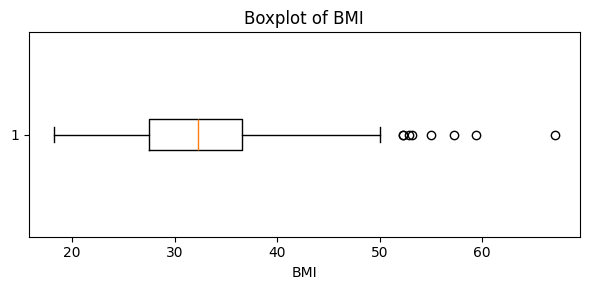

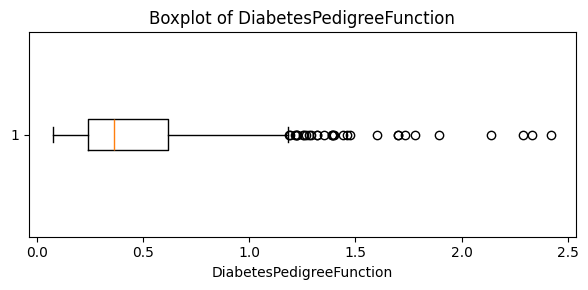

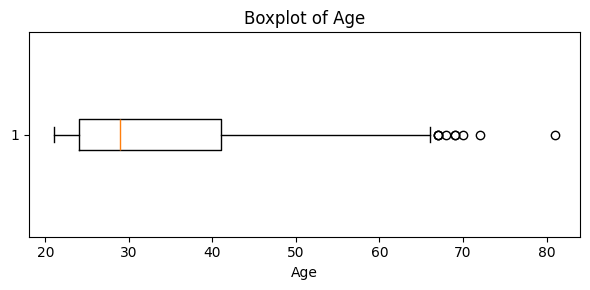

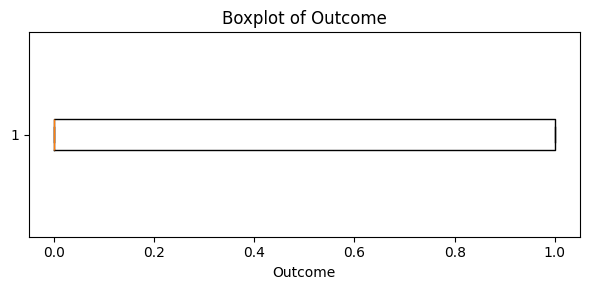

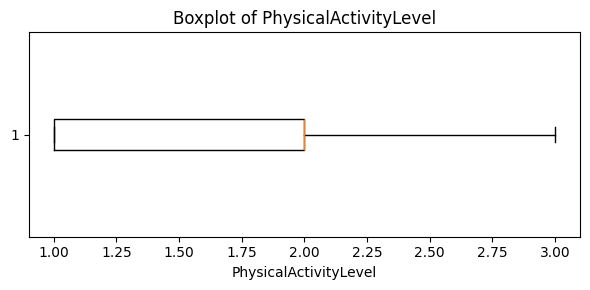

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(data_frame[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


Correlation matrix and strongest correlations with Outcome which shows pairwise relationships and which features correlate with the target.

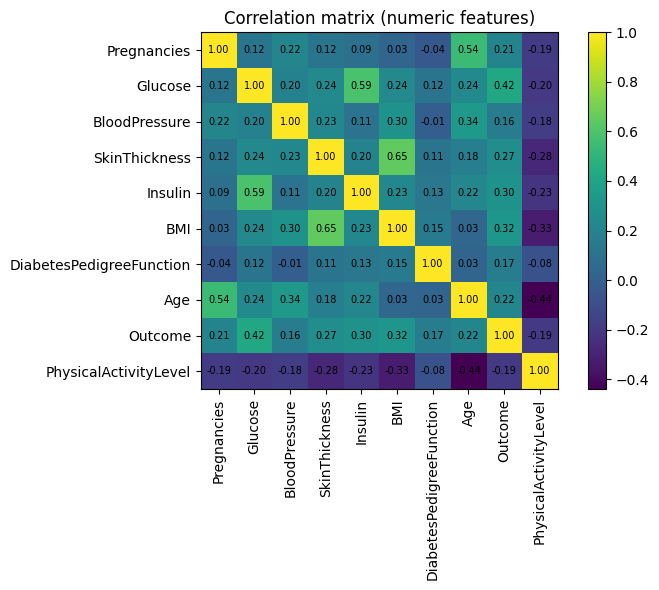


Features sorted by absolute correlation with Outcome:
Glucose                     0.420356
BMI                         0.317989
Insulin                     0.299540
SkinThickness               0.268260
Age                         0.221896
Pregnancies                 0.211154
PhysicalActivityLevel       0.193977
DiabetesPedigreeFunction    0.169876
BloodPressure               0.163946
Name: Outcome, dtype: float64


In [13]:
corr = data_frame.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
im = plt.imshow(corr, interpolation='nearest')
plt.colorbar(im)
plt.xticks(ticks=range(len(corr)), labels=corr.columns, rotation=90)
plt.yticks(ticks=range(len(corr)), labels=corr.columns)
plt.title("Correlation matrix (numeric features)")
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", fontsize=7)
plt.tight_layout()
plt.show()

# Print features ordered by absolute correlation with Outcome
outcome_corr = corr['Outcome'].drop('Outcome').abs().sort_values(ascending=False)
print("\nFeatures sorted by absolute correlation with Outcome:")
print(outcome_corr)


# 3. DATA CLEANING AND PREPROCESSING


In [14]:
dup_count = data_frame.duplicated().sum()
print(f"Duplicate rows count: {dup_count}")

if dup_count > 0:
    print("\n--- Displaying the first 10 duplicated rows: ---")

    # Sorting by all columns can be slow and is usually unnecessary for display.
    # for Better performance Display the first 10 unique instances of duplicated rows
    display(data_frame[data_frame.duplicated(keep='first')].head(10))

    # Apply the removal and reset index
    data_frame = data_frame.drop_duplicates().reset_index(drop=True)
    print(f"\nDropped duplicates. New shape: {data_frame.shape}")

else:
    print("No duplicates found, DataFrame shape remains:", data_frame.shape)


Duplicate rows count: 28

--- Displaying the first 10 duplicated rows: ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory
117,0,117.0,NaN,NaN,NaN,33.8,0.932,44,0,1,Strong
118,7,184.0,84.0,33.0,NaN,35.5,0.355,41,1,3,NaN
153,1,71.0,48.0,18.0,76.0,20.4,0.323,22,0,2,NaN
219,10,129.0,76.0,28.0,122.0,35.9,0.280,39,0,2,NaN
253,7,179.0,95.0,31.0,NaN,34.2,0.164,60,0,1,NaN
264,3,84.0,72.0,32.0,NaN,37.2,0.267,28,0,2,NaN
282,2,102.0,86.0,36.0,120.0,45.5,0.127,23,1,2,NaN
319,5,96.0,74.0,18.0,67.0,33.6,0.997,43,0,1,Strong
375,1,88.0,78.0,29.0,76.0,32.0,0.365,29,0,1,NaN
406,3,89.0,74.0,16.0,85.0,30.4,0.551,38,0,1,Moderate



Dropped duplicates. New shape: (770, 11)


In [15]:
# Assign 0 to NaN, and 1, 2, 3 to the rest. We will impute the NaNs later.
risk_map = {
    'Moderate': 2,
    'Strong': 3
    # Note: If 'Weak' or 'No' existed, they would be 1 and 0, respectively.
    # Since only 'Moderate' and 'Strong' exist besides NaN, 1 and 0 might be implicitly missing.
    # assumed 1 is 'Weak' and 0 is 'No' (or the absence of history) if they were present.
}

# Create a new numerical column using .map()
# Any values in the column not in the risk_map (including the 411 NaNs) will remain NaN.
data_frame['FamilyHistory_Score'] = data_frame['FamilyHistory'].map(risk_map)

# Drop the original categorical column
data_frame = data_frame.drop('FamilyHistory', axis=1)

print("\nFamily History Score Counts:")
print(data_frame['FamilyHistory_Score'].value_counts(dropna=False))
# Output should show 411 NaNs, and counts for 2.0 (Moderate) and 3.0 (Strong).


Family History Score Counts:
FamilyHistory_Score
NaN    411
2.0    253
3.0    106
Name: count, dtype: int64


Impute missing values (median example)

In [16]:
# UPDATE THE IMPUTATION LIST
full_impute_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'FamilyHistory_Score']

print("\nMissing before full imputation:")
print(data_frame[full_impute_cols].isnull().sum())

# 1. Calculate all medians simultaneously
imputation_values = data_frame[full_impute_cols].median()

# 2. Apply imputation to the DataFrame
data_frame[full_impute_cols] = data_frame[full_impute_cols].fillna(imputation_values)

# Print the used medians
print("\n--- Imputation Values Used ---")
print(imputation_values)

print("\nMissing after full median imputation:")
print(data_frame[full_impute_cols].isnull().sum())
# All counts should now be 0.


Missing before full imputation:
Glucose                  5
BloodPressure           35
SkinThickness          239
Insulin                384
BMI                     26
FamilyHistory_Score    411
dtype: int64

--- Imputation Values Used ---
Glucose                117.0
BloodPressure           72.0
SkinThickness           29.0
Insulin                125.0
BMI                     32.3
FamilyHistory_Score      2.0
dtype: float64

Missing after full median imputation:
Glucose                0
BloodPressure          0
SkinThickness          0
Insulin                0
BMI                    0
FamilyHistory_Score    0
dtype: int64


# 4. FEATURE ENGINEERING AND SCALING

In [17]:
#====================================================================================================================================================
# Create Categorical Bins (Discretization)
#====================================================================================================================================================

def bmi_category(bmi):
    if pd.isna(bmi):
        return np.nan
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def age_group(age):
    if age < 30:
        return '21-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

data_frame['BMI_Category'] = data_frame['BMI'].apply(bmi_category)
data_frame['Age_Group'] = data_frame['Age'].apply(age_group)

print(data_frame['BMI_Category'].value_counts())
print(data_frame['Age_Group'].value_counts())


BMI_Category
Obese          487
Overweight     177
Normal         102
Underweight      4
Name: count, dtype: int64
Age_Group
21-29    397
30-39    166
40-49    118
50-59     57
60+       32
Name: count, dtype: int64


One-hot encode categorical engineered fields

In [18]:
#====================================================================================================================================================
# One-Hot Encoding
#====================================================================================================================================================

data_frame = pd.get_dummies(data_frame, columns=['BMI_Category','Age_Group'], drop_first=True)
print("Columns after encoding:", data_frame.columns.tolist()[:30])


Columns after encoding: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PhysicalActivityLevel', 'FamilyHistory_Score', 'BMI_Category_Obese', 'BMI_Category_Overweight', 'BMI_Category_Underweight', 'Age_Group_30-39', 'Age_Group_40-49', 'Age_Group_50-59', 'Age_Group_60+']


Scale numeric features and save cleaned CSV to process file you can use for model training.

In [19]:
data_frame.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory_Score,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_30-39,Age_Group_40-49,Age_Group_50-59,Age_Group_60+
0,2,90.0,60.0,29.0,125.0,23.5,0.191,25,0,2,2.0,False,False,False,False,False,False,False
1,1,112.0,80.0,45.0,132.0,34.8,0.217,24,0,2,2.0,True,False,False,False,False,False,False
2,2,141.0,58.0,34.0,128.0,25.4,0.699,24,0,2,2.0,False,True,False,False,False,False,False
3,6,91.0,72.0,29.0,125.0,29.8,0.501,31,0,1,2.0,False,True,False,True,False,False,False
4,0,109.0,88.0,30.0,125.0,32.5,0.855,38,1,2,3.0,True,False,False,True,False,False,False
5,2,92.0,76.0,20.0,125.0,24.2,1.698,28,0,2,3.0,False,False,False,False,False,False,False
6,1,139.0,46.0,19.0,83.0,28.7,0.654,22,0,1,2.0,False,True,False,False,False,False,False
7,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0,2,2.0,True,False,False,False,False,False,False
8,2,157.0,74.0,35.0,440.0,39.4,0.134,30,0,1,2.0,True,False,False,True,False,False,False
9,1,135.0,54.0,29.0,125.0,26.7,0.687,62,0,1,2.0,False,True,False,False,False,False,True


In [20]:
data_frame.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory_Score,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_30-39,Age_Group_40-49,Age_Group_50-59,Age_Group_60+
760,0,74.0,52.0,10.0,36.0,27.8,0.269,22,0,2,2.0,False,True,False,False,False,False,False
761,6,111.0,64.0,39.0,125.0,34.2,0.260,24,0,1,2.0,True,False,False,False,False,False,False
762,11,138.0,74.0,26.0,144.0,36.1,0.557,50,1,2,2.0,True,False,False,False,False,True,False
763,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0,2,2.0,True,False,False,False,False,False,False
764,2,122.0,76.0,27.0,200.0,35.9,0.483,26,0,2,2.0,True,False,False,False,False,False,False
765,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0,2,2.0,False,True,False,False,False,False,False
766,1,96.0,122.0,29.0,125.0,22.4,0.207,27,0,3,2.0,False,False,False,False,False,False,False
767,10,101.0,86.0,37.0,125.0,45.6,1.136,38,1,2,3.0,True,False,False,True,False,False,False
768,0,141.0,72.0,29.0,125.0,42.4,0.205,29,1,1,2.0,True,False,False,False,False,False,False
769,0,125.0,96.0,29.0,125.0,22.5,0.262,21,0,2,2.0,False,False,False,False,False,False,False


In [21]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               770 non-null    int64  
 1   Glucose                   770 non-null    float64
 2   BloodPressure             770 non-null    float64
 3   SkinThickness             770 non-null    float64
 4   Insulin                   770 non-null    float64
 5   BMI                       770 non-null    float64
 6   DiabetesPedigreeFunction  770 non-null    float64
 7   Age                       770 non-null    int64  
 8   Outcome                   770 non-null    int64  
 9   PhysicalActivityLevel     770 non-null    int64  
 10  FamilyHistory_Score       770 non-null    float64
 11  BMI_Category_Obese        770 non-null    bool   
 12  BMI_Category_Overweight   770 non-null    bool   
 13  BMI_Category_Underweight  770 non-null    bool   
 14  Age_Group_

In [22]:
data_frame.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PhysicalActivityLevel,FamilyHistory_Score
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,3.851948,122.777144,72.390909,29.023377,140.035065,32.427273,0.472235,33.229870,0.348052,1.651948,2.137662
std,3.368778,37.247897,12.085055,8.710454,84.857611,6.825389,0.331210,11.749682,0.476662,0.518478,0.344769
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,1.000000,2.000000
25%,1.000000,99.250000,64.000000,25.000000,125.000000,27.600000,0.244000,24.000000,0.000000,1.000000,2.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,2.000000,2.000000
75%,6.000000,140.750000,80.000000,32.000000,125.000000,36.400000,0.626750,41.000000,1.000000,2.000000,2.000000
max,17.000000,530.843990,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000,3.000000


# 5. SPLITTING, RESAMPLING, AND MODELING

In [23]:
#====================================================================================================================================================
# Separate Features and Target
#====================================================================================================================================================

X = data_frame.drop('Outcome', axis=1)
Y = data_frame['Outcome']

print("Class distribution before oversampling:")
print(Y.value_counts())

Class distribution before oversampling:
Outcome
0    502
1    268
Name: count, dtype: int64


In [25]:
# Random Over Sampling
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, Y)

print(f"Shape after ROS: {y_ros.shape}")
print(y_ros.value_counts())

# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)

print(f"Shape after RUS: {y_rus.shape}")
print(y_rus.value_counts())

# Smote
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(X, Y)

print(f"Shape after SMOTE: {y_smote.shape}")
print(y_smote.value_counts())

# SMOTEENN automatically combines both ROS and SMOTE (SMOTE + Edited Nearest Neighbors) we use this because pure SMOTE resulted in a higher F1 score and ROS gave us higher accuracy
smenn = SMOTEENN(random_state=42)
x_smenn, y_smenn = smenn.fit_resample(X, Y)

print(f"Shape after SMOTE-ENN: {y_smenn.shape}")
print(y_smenn.value_counts())

Shape after ROS: (1004,)
Outcome
0    502
1    502
Name: count, dtype: int64
Shape after RUS: (536,)
Outcome
0    268
1    268
Name: count, dtype: int64
Shape after SMOTE: (1004,)
Outcome
0    502
1    502
Name: count, dtype: int64
Shape after SMOTE-ENN: (523,)
Outcome
1    285
0    238
Name: count, dtype: int64


In [26]:
# Train-test split after resampling With RUS

X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(
    x_rus, y_rus,
    test_size=0.3,
    random_state=42,
    stratify=y_rus
)

print("Shape of X_train:", X_rus_train.shape)
print("Shape of X_test:", X_rus_test.shape)
print("Shape of y_train:", y_rus_train.shape)
print("Shape of y_test:", y_rus_test.shape)

print("\nClass distribution in y_train:")
print(y_rus_train.value_counts())

print("\nClass distribution in y_test:")
print(y_rus_test.value_counts())

Shape of X_train: (375, 17)
Shape of X_test: (161, 17)
Shape of y_train: (375,)
Shape of y_test: (161,)

Class distribution in y_train:
Outcome
1    188
0    187
Name: count, dtype: int64

Class distribution in y_test:
Outcome
0    81
1    80
Name: count, dtype: int64


In [27]:
# Train-test split after resampling With ROS
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(
    x_ros, y_ros,
    test_size=0.3,
    random_state=42,
    stratify=y_ros
)

print("Shape of X_train:", X_ros_train.shape)
print("Shape of X_test:", X_ros_test.shape)
print("Shape of y_train:", y_ros_train.shape)
print("Shape of y_test:", y_ros_test.shape)

print("\nClass distribution in y_train:")
print(y_ros_train.value_counts())

print("\nClass distribution in y_test:")
print(y_ros_test.value_counts())

Shape of X_train: (702, 17)
Shape of X_test: (302, 17)
Shape of y_train: (702,)
Shape of y_test: (302,)

Class distribution in y_train:
Outcome
1    351
0    351
Name: count, dtype: int64

Class distribution in y_test:
Outcome
1    151
0    151
Name: count, dtype: int64


In [28]:
# Train-test split after resampling With SMOTE
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(
    x_smote, y_smote,
    test_size=0.3,
    random_state=42,
    stratify=y_smote
)

print("Shape of X_train:", X_smote_train.shape)
print("Shape of X_test:", X_smote_test.shape)
print("Shape of y_train:", y_smote_train.shape)
print("Shape of y_test:", y_smote_test.shape)

print("\nClass distribution in y_train:")
print(y_smote_train.value_counts())

print("\nClass distribution in y_test:")
print(y_smote_test.value_counts())

Shape of X_train: (702, 17)
Shape of X_test: (302, 17)
Shape of y_train: (702,)
Shape of y_test: (302,)

Class distribution in y_train:
Outcome
1    351
0    351
Name: count, dtype: int64

Class distribution in y_test:
Outcome
1    151
0    151
Name: count, dtype: int64


In [29]:
# Train-test split after resampling With SMOTE-EEN
X_smen_train, X_smen_test, y_smen_train, y_smen_test = train_test_split(
    x_smenn, y_smenn,
    test_size=0.3,
    random_state=42,
    stratify=y_smenn
)

print("Shape of X_train:", X_smen_train.shape)
print("Shape of X_test:", X_smen_test.shape)
print("Shape of y_train:", y_smen_train.shape)
print("Shape of y_test:", y_smen_test.shape)

print("\nClass distribution in y_train:")
print(y_smen_train.value_counts())

print("\nClass distribution in y_test:")
print(y_smen_test.value_counts())

Shape of X_train: (366, 17)
Shape of X_test: (157, 17)
Shape of y_train: (366,)
Shape of y_test: (157,)

Class distribution in y_train:
Outcome
1    199
0    167
Name: count, dtype: int64

Class distribution in y_test:
Outcome
1    86
0    71
Name: count, dtype: int64


Training and testing with Random Under Sampling


In [30]:
#====================================================================================================================================================
# Feature Scaling for RUS
#====================================================================================================================================================

scaler = StandardScaler()
X_rus_train_scaled = scaler.fit_transform(X_rus_train)
X_rus_test_scaled = scaler.transform(X_rus_test)

# Dictionaries for results
model_scores = {}
best_models = {}

In [31]:
#====================================================================================================================================================
# Logistic Regression + Hyperparameter Tuning
#====================================================================================================================================================
log_params = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

log_model = GridSearchCV(
    LogisticRegression(max_iter=300, class_weight="balanced"),
    log_params,
    cv=5,
    scoring="accuracy"
)

log_model.fit(X_rus_train_scaled, y_rus_train)

# Predict on TEST ONLY (no val)
log_test_pred = log_model.predict(X_rus_test_scaled)
log_f1 = f1_score(y_rus_test, log_test_pred)

model_scores["Logistic Regression"] = log_f1
best_models["Logistic Regression"] = log_model

print("===== Logistic Regression (Test Evaluation) =====")
print("Best Parameters:", log_model.best_params_)
print(classification_report(y_rus_test, log_test_pred))

===== Logistic Regression (Test Evaluation) =====
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        81
           1       0.77      0.80      0.79        80

    accuracy                           0.78       161
   macro avg       0.78      0.78      0.78       161
weighted avg       0.78      0.78      0.78       161



In [32]:
#====================================================================================================================================================
# Decision Tree + Hyperparameter Tuning
#====================================================================================================================================================
dt_params = {
    "max_depth": [3, 5, 7, 9, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

dt_model = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    dt_params,
    cv=5,
    scoring="accuracy"
)

dt_model.fit(X_rus_train, y_rus_train)

# Predict on TEST ONLY
dt_test_pred = dt_model.predict(X_rus_test)
dt_f1 = f1_score(y_rus_test, dt_test_pred)

model_scores["Decision Tree"] = dt_f1
best_models["Decision Tree"] = dt_model

print("===== Decision Tree (Test Evaluation) =====")
print("Best Parameters:", dt_model.best_params_)
print(classification_report(y_rus_test, dt_test_pred))

===== Decision Tree (Test Evaluation) =====
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        81
           1       0.72      0.78      0.75        80

    accuracy                           0.74       161
   macro avg       0.74      0.74      0.74       161
weighted avg       0.74      0.74      0.74       161



In [33]:
#====================================================================================================================================================
# SVM + Hyperparameter Tuning
#====================================================================================================================================================
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svm_model = GridSearchCV(
    SVC(probability=True, class_weight="balanced"),
    svm_params,
    cv=5,
    scoring="accuracy"
)

svm_model.fit(X_rus_train_scaled, y_rus_train)

# Predict on TEST ONLY
svm_test_pred = svm_model.predict(X_rus_test_scaled)
svm_f1 = f1_score(y_rus_test, svm_test_pred)

model_scores["SVM"] = svm_f1
best_models["SVM"] = svm_model

print("===== SVM (Test Evaluation) =====")
print("Best Parameters:", svm_model.best_params_)
print(classification_report(y_rus_test, svm_test_pred))


===== SVM (Test Evaluation) =====
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        81
           1       0.80      0.79      0.79        80

    accuracy                           0.80       161
   macro avg       0.80      0.79      0.79       161
weighted avg       0.80      0.80      0.80       161



In [34]:
#====================================================================================================================================================
# Random Forest + Hyperparameter Tuning
#====================================================================================================================================================
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

base_rf = RandomForestClassifier(random_state=42)

rf_model = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=rf_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_rus_train_scaled, y_rus_train)


# Predict on TEST set
rf_test_pred = rf_model.predict(X_rus_test_scaled)
rf_f1 = f1_score(y_rus_test, rf_test_pred)

model_scores["Random Forest"] = rf_f1
best_models["Random Forest"] = rf_model

print("===== Random Forest (Test Evaluation) =====")
print("Best Parameters:", rf_model.best_params_)
print(classification_report(y_rus_test, rf_test_pred))


===== Random Forest (Test Evaluation) =====
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        81
           1       0.80      0.88      0.83        80

    accuracy                           0.83       161
   macro avg       0.83      0.83      0.83       161
weighted avg       0.83      0.83      0.83       161



Training and testing with Random Over Sampling


In [35]:
#====================================================================================================================================================
# Feature Scaling for ROS
#====================================================================================================================================================

scaler = StandardScaler()
X_ros_train_scaled = scaler.fit_transform(X_ros_train)
X_ros_test_scaled = scaler.transform(X_ros_test)

# Dictionaries for results
model_scores = {}
best_models = {}

In [36]:
#====================================================================================================================================================
# Logistic Regression + Hyperparameter Tuning
#====================================================================================================================================================
log_params = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

log_model = GridSearchCV(
    LogisticRegression(max_iter=300, class_weight="balanced"),
    log_params,
    cv=5,
    scoring="accuracy"
)

log_model.fit(X_ros_train_scaled, y_ros_train)

# Predict on TEST ONLY (no val)
log_test_pred = log_model.predict(X_rus_test_scaled)
log_f1 = f1_score(y_rus_test, log_test_pred)

model_scores["Logistic Regression"] = log_f1
best_models["Logistic Regression"] = log_model

print("===== Logistic Regression (Test Evaluation) =====")
print("Best Parameters:", log_model.best_params_)
print(classification_report(y_rus_test, log_test_pred))

===== Logistic Regression (Test Evaluation) =====
Best Parameters: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        81
           1       0.80      0.85      0.82        80

    accuracy                           0.82       161
   macro avg       0.82      0.82      0.82       161
weighted avg       0.82      0.82      0.82       161



In [37]:
#====================================================================================================================================================
# Decision Tree + Hyperparameter Tuning
#====================================================================================================================================================
dt_params = {
    "max_depth": [3, 5, 7, 9, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

dt_model = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    dt_params,
    cv=5,
    scoring="accuracy"
)

dt_model.fit(X_ros_train, y_ros_train)

# Predict on TEST ONLY
dt_test_pred = dt_model.predict(X_ros_test)
dt_f1 = f1_score(y_ros_test, dt_test_pred)

model_scores["Decision Tree"] = dt_f1
best_models["Decision Tree"] = dt_model

print("===== Decision Tree (Test Evaluation) =====")
print("Best Parameters:", dt_model.best_params_)
print(classification_report(y_ros_test, dt_test_pred))

===== Decision Tree (Test Evaluation) =====
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       151
           1       0.78      0.85      0.81       151

    accuracy                           0.80       302
   macro avg       0.81      0.80      0.80       302
weighted avg       0.81      0.80      0.80       302



In [38]:
#====================================================================================================================================================
# SVM + Hyperparameter Tuning
#====================================================================================================================================================
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svm_model = GridSearchCV(
    SVC(probability=True, class_weight="balanced"),
    svm_params,
    cv=5,
    scoring="accuracy"
)

svm_model.fit(X_ros_train_scaled, y_ros_train)

# Predict on TEST ONLY
svm_test_pred = svm_model.predict(X_ros_test_scaled)
svm_f1 = f1_score(y_ros_test, svm_test_pred)

model_scores["SVM"] = svm_f1
best_models["SVM"] = svm_model

print("===== SVM (Test Evaluation) =====")
print("Best Parameters:", svm_model.best_params_)
print(classification_report(y_ros_test, svm_test_pred))


===== SVM (Test Evaluation) =====
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.78      0.74      0.76       151

    accuracy                           0.76       302
   macro avg       0.76      0.76      0.76       302
weighted avg       0.76      0.76      0.76       302



In [39]:
#====================================================================================================================================================
# Random Forest + Hyperparameter Tuning
#====================================================================================================================================================
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

base_rf = RandomForestClassifier(random_state=42)

rf_model = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=rf_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_ros_train_scaled, y_ros_train)


# Predict on TEST set
rf_test_pred = rf_model.predict(X_ros_test_scaled)
rf_f1 = f1_score(y_ros_test, rf_test_pred)

model_scores["Random Forest"] = rf_f1
best_models["Random Forest"] = rf_model

print("===== Random Forest (Test Evaluation) =====")
print("Best Parameters:", rf_model.best_params_)
print(classification_report(y_ros_test, rf_test_pred))


===== Random Forest (Test Evaluation) =====
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       151
           1       0.78      0.90      0.84       151

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.82       302
weighted avg       0.83      0.82      0.82       302



Training and testing with SMOTE

In [40]:
#====================================================================================================================================================
# Feature Scaling for SMOTE
#====================================================================================================================================================

scaler = StandardScaler()
X_smote_train_scaled = scaler.fit_transform(X_smote_train)
X_smote_test_scaled = scaler.transform(X_smote_test)

# Dictionaries for results
model_scores = {}
best_models = {}

In [41]:
#====================================================================================================================================================
# Logistic Regression + Hyperparameter Tuning
#====================================================================================================================================================
log_params = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

log_model = GridSearchCV(
    LogisticRegression(max_iter=300, class_weight="balanced"),
    log_params,
    cv=5,
    scoring="accuracy"
)

log_model.fit(X_smote_train_scaled, y_smote_train)

# Predict on TEST ONLY (no val)
log_test_pred = log_model.predict(X_smote_test_scaled)
log_f1 = f1_score(y_smote_test, log_test_pred)

model_scores["Logistic Regression"] = log_f1
best_models["Logistic Regression"] = log_model

print("===== Logistic Regression (Test Evaluation) =====")
print("Best Parameters:", log_model.best_params_)
print(classification_report(y_smote_test, log_test_pred))

===== Logistic Regression (Test Evaluation) =====
Best Parameters: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.76      0.79      0.78       151

    accuracy                           0.77       302
   macro avg       0.77      0.77      0.77       302
weighted avg       0.77      0.77      0.77       302



In [42]:
#====================================================================================================================================================
# Decision Tree + Hyperparameter Tuning
#====================================================================================================================================================
dt_params = {
    "max_depth": [3, 5, 7, 9, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

dt_model = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    dt_params,
    cv=5,
    scoring="accuracy"
)

dt_model.fit(X_smote_train, y_smote_train)

# Predict on TEST ONLY
dt_test_pred = dt_model.predict(X_smote_test)
dt_f1 = f1_score(y_smote_test, dt_test_pred)

model_scores["Decision Tree"] = dt_f1
best_models["Decision Tree"] = dt_model

print("===== Decision Tree (Test Evaluation) =====")
print("Best Parameters:", dt_model.best_params_)
print(classification_report(y_smote_test, dt_test_pred))

===== Decision Tree (Test Evaluation) =====
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.74      0.81      0.77       151

    accuracy                           0.76       302
   macro avg       0.76      0.76      0.76       302
weighted avg       0.76      0.76      0.76       302



In [43]:
#====================================================================================================================================================
# SVM + Hyperparameter Tuning
#====================================================================================================================================================
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svm_model = GridSearchCV(
    SVC(probability=True, class_weight="balanced"),
    svm_params,
    cv=5,
    scoring="accuracy"
)

svm_model.fit(X_smote_train_scaled, y_smote_train)

# Predict on TEST ONLY
svm_test_pred = svm_model.predict(X_smote_test_scaled)
svm_f1 = f1_score(y_smote_test, svm_test_pred)

model_scores["SVM"] = svm_f1
best_models["SVM"] = svm_model

print("===== SVM (Test Evaluation) =====")
print("Best Parameters:", svm_model.best_params_)
print(classification_report(y_smote_test, svm_test_pred))


===== SVM (Test Evaluation) =====
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       151
           1       0.77      0.78      0.78       151

    accuracy                           0.77       302
   macro avg       0.77      0.77      0.77       302
weighted avg       0.77      0.77      0.77       302



In [44]:
#====================================================================================================================================================
# Random Forest + Hyperparameter Tuning
#====================================================================================================================================================
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

base_rf = RandomForestClassifier(random_state=42)

rf_model = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=rf_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_smote_train_scaled, y_smote_train)


# Predict on TEST set
rf_test_pred = rf_model.predict(X_smote_test_scaled)
rf_f1 = f1_score(y_smote_test, rf_test_pred)

model_scores["Random Forest"] = rf_f1
best_models["Random Forest"] = rf_model

print("===== Random Forest (Test Evaluation) =====")
print("Best Parameters:", rf_model.best_params_)
print(classification_report(y_smote_test, rf_test_pred))


===== Random Forest (Test Evaluation) =====
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       151
           1       0.80      0.83      0.82       151

    accuracy                           0.81       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.81      0.81       302



Training and testing with SMOTE-EEN


In [45]:
#====================================================================================================================================================
# Feature Scaling for SMOTE-EEN
#====================================================================================================================================================

scaler = StandardScaler()
X_smen_train_scaled = scaler.fit_transform(X_smen_train)
X_smen_test_scaled = scaler.transform(X_smen_test)

# Dictionaries for results
model_scores = {}
best_models = {}

In [46]:
#====================================================================================================================================================
# Logistic Regression + Hyperparameter Tuning
#====================================================================================================================================================
log_params = {
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

log_model = GridSearchCV(
    LogisticRegression(max_iter=300, class_weight="balanced"),
    log_params,
    cv=5,
    scoring="accuracy"
)

log_model.fit(X_smen_train_scaled, y_smen_train)

# Predict on TEST ONLY (no val)
log_test_pred = log_model.predict(X_smen_test_scaled)
log_f1 = f1_score(y_smen_test, log_test_pred)

model_scores["Logistic Regression"] = log_f1
best_models["Logistic Regression"] = log_model

print("===== Logistic Regression (Test Evaluation) =====")
print("Best Parameters:", log_model.best_params_)
print(classification_report(y_smen_test, log_test_pred))

===== Logistic Regression (Test Evaluation) =====
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        71
           1       0.90      0.97      0.93        86

    accuracy                           0.92       157
   macro avg       0.93      0.92      0.92       157
weighted avg       0.93      0.92      0.92       157



In [48]:
#====================================================================================================================================================
# Decision Tree + Hyperparameter Tuning
#====================================================================================================================================================
dt_params = {
    "max_depth": [3, 5, 7, 9, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

dt_model = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    dt_params,
    cv=5,
    scoring="accuracy"
)

dt_model.fit(X_smen_train, y_smen_train)

# Predict on TEST ONLY
dt_test_pred = dt_model.predict(X_smen_test)
dt_f1 = f1_score(y_smen_test, dt_test_pred)

model_scores["Decision Tree"] = dt_f1
best_models["Decision Tree"] = dt_model

print("===== Decision Tree (Test Evaluation) =====")
print("Best Parameters:", dt_model.best_params_)
print(classification_report(y_smen_test, dt_test_pred))


===== Decision Tree (Test Evaluation) =====
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        71
           1       0.88      0.91      0.89        86

    accuracy                           0.88       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.88      0.88      0.88       157



In [49]:
#====================================================================================================================================================
# SVM + Hyperparameter Tuning
#====================================================================================================================================================
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svm_model = GridSearchCV(
    SVC(probability=True, class_weight="balanced"),
    svm_params,
    cv=5,
    scoring="accuracy"
)

svm_model.fit(X_smen_train_scaled, y_smen_train)

# Predict on TEST ONLY
svm_test_pred = svm_model.predict(X_smen_test_scaled)
svm_f1 = f1_score(y_smen_test, svm_test_pred)

model_scores["SVM"] = svm_f1
best_models["SVM"] = svm_model

print("===== SVM (Test Evaluation) =====")
print("Best Parameters:", svm_model.best_params_)
print(classification_report(y_smen_test, svm_test_pred))

===== SVM (Test Evaluation) =====
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        71
           1       0.93      0.98      0.95        86

    accuracy                           0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157



In [50]:
#====================================================================================================================================================
# Random Forest + Hyperparameter Tuning
#====================================================================================================================================================
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

base_rf = RandomForestClassifier(random_state=42)

rf_model = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=rf_params,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_smen_train_scaled, y_smen_train)


# Predict on TEST set
rf_test_pred = rf_model.predict(X_smen_test_scaled)
rf_f1 = f1_score(y_smen_test, rf_test_pred)

model_scores["Random Forest"] = rf_f1
best_models["Random Forest"] = rf_model

print("===== Random Forest (Test Evaluation) =====")
print("Best Parameters:", rf_model.best_params_)
print(classification_report(y_smen_test, rf_test_pred))


===== Random Forest (Test Evaluation) =====
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.93      0.99      0.96        86

    accuracy                           0.96       157
   macro avg       0.96      0.95      0.95       157
weighted avg       0.96      0.96      0.96       157



**Saving trained models into pickle files to import later without training again if needed**


In [51]:
with open('rfModel.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('dt_model.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)

with open('log_model.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

In [52]:
#====================================================================================================================================================
# Select Best Model Based on Validation Accuracy
#====================================================================================================================================================
best_model_name = max(model_scores, key=model_scores.get)
best_model = best_models[best_model_name]

print("\n===============================")
print("      BEST MODEL SELECTED")
print("===============================")
print("Best Model:", best_model_name)
print("Best Validation Accuracy:", model_scores[best_model_name])
print("Best Hyperparameters:", best_model.best_params_)


      BEST MODEL SELECTED
Best Model: Random Forest
Best Validation Accuracy: 0.96045197740113
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}


# 5. FINAL EVALUATION AND SAVING


In [53]:
#====================================================================================================================================================
# Final Test Set Evaluation for the best model
#====================================================================================================================================================
y_test_pred_final = best_model.predict(X_smen_test_scaled)
final_accuracy = accuracy_score(y_smen_test, y_test_pred_final)
classification_report(y_smen_test, y_test_pred_final)
cm = confusion_matrix(y_smen_test, y_test_pred_final)

TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:\n", cm)
print(f"\nTrue Negatives (TN): {TN} (Correctly predicted non-diabetic)")
print(f"False Positives (FP): {FP} (Incorrectly predicted diabetic)")
print(f"False Negatives (FN): {FN} (Incorrectly predicted non-diabetic)")
print(f"True Positives (TP): {TP} (Correctly predicted diabetic)")
print("\n--- FINAL TEST ACCURACY ---")
print(f"Best Model ({best_model_name}) Test Accuracy: {final_accuracy:.4f}")

Confusion Matrix:
 [[65  6]
 [ 1 85]]

True Negatives (TN): 65 (Correctly predicted non-diabetic)
False Positives (FP): 6 (Incorrectly predicted diabetic)
False Negatives (FN): 1 (Incorrectly predicted non-diabetic)
True Positives (TP): 85 (Correctly predicted diabetic)

--- FINAL TEST ACCURACY ---
Best Model (Random Forest) Test Accuracy: 0.9554
